<a href="https://colab.research.google.com/github/Nagmashaik123/MedConcepts/blob/main/ConceptHashTagFreqCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('MedicalDyfunctions.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

In [ ]:
dataFrame=df[['CUID','Concept','HashTags']]
dataFrame = dataFrame.dropna()

dataFrame.reset_index(drop=True)

In [ ]:
dictValue=dataFrame.to_dict('records')
dictValue

In [ ]:
with open("testJson.json", "w") as outfile: 
    json.dump(dictValue, outfile)

In [19]:
import json
import csv
import glob

jsonList = [{"CUID": "C0002884", "Concept": "Hypochromic anemia", "HashTags": "hypochromicanemia,, natural,, healthcare,, chlorosis,, anemia"},
            {"CUID": "C0002884", "Concept": "Hypochromic anemia", "HashTags": "HypochromicAnemia"},
            {"CUID": "C0002884", "Concept": "Hypochromic anemia", "HashTags": "Chlorosis, TheHulk, HypochromicAnemia"},
            {"CUID": "C0014431", "Concept": "Enzyme Induction", "HashTags": "enzymeinduction, hangovercure"},
            {"CUID": "C0014431", "Concept": "Enzyme Induction", "HashTags": "enzymeinduction, hangovercure"},
            {"CUID": "C0014431", "Concept": "Enzyme Induction", "HashTags": "CholesterolLowering, EnzymeInduction"}]

dictConcept={}

def conceptHashTagCount():
    for eachJson in jsonList:
        concept= eachJson['Concept']
        hashTags=eachJson['HashTags']
        if concept not in dictConcept.keys():
            dictHashTags={}
            dictConcept[concept]=getdictHashTags(hashTags,dictHashTags)
        else:
            existingHashTagDic = dictConcept[concept]
            dictConcept[concept]=getdictHashTags(hashTags,existingHashTagDic)
def getdictHashTags(hashTags,dictHashTags):
    # print(hashTags)

    hashTagList = hashTags.split(', ')
    for hashTag in hashTagList:
        hashTag=hashTag.lower()
        if hashTag.endswith(','):
            hashTag=hashTag[:-1]

        if hashTag not in dictHashTags.keys():
            dictHashTags[hashTag] = 1
        else:
            dictHashTags[hashTag] = dictHashTags[hashTag] + 1
    return dictHashTags



conceptHashTagCount()
dictConcept

{'Enzyme Induction': {'cholesterollowering': 1,
  'enzymeinduction': 3,
  'hangovercure': 2},
 'Hypochromic anemia': {'anemia': 1,
  'chlorosis': 2,
  'healthcare': 1,
  'hypochromicanemia': 3,
  'natural': 1,
  'thehulk': 1}}

In [20]:
import pandas as pd
rows=[]
# appending rows
for concept, hashDict in dictConcept.items():
    for hashTag in hashDict.keys():
        row = {}
        row['Concept']=concept
        row['HashTag']=hashTag
        row['Frequency']=hashDict[hashTag]
        rows.append(row)

# using data frame
df = pd.DataFrame(rows)
df

,Concept,HashTag,Frequency
0,Hypochromic anemia,hypochromicanemia,3
1,Hypochromic anemia,natural,1
2,Hypochromic anemia,healthcare,1
3,Hypochromic anemia,chlorosis,2
4,Hypochromic anemia,anemia,1
5,Hypochromic anemia,thehulk,1
6,Enzyme Induction,enzymeinduction,3
7,Enzyme Induction,hangovercure,2
8,Enzyme Induction,cholesterollowering,1


  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       30
1    B       20       25       15       25
2    C       12       15       19        6
3    D       10       29       13       19


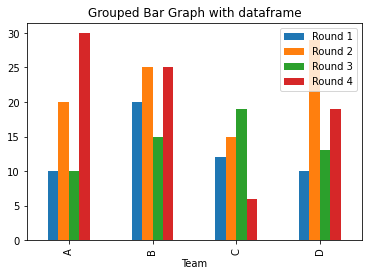

In [ ]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')
